Code snippets from chapter 2

R code 2.1

In [12]:
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

R code 2.2

In [13]:
dbinom( 6 , size=9 , prob=0.5 )

[1] 0.1640625

R code 2.3

In [14]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )
# define prior
prior <- rep( 1 , 20 )
# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )
# compute product of likelihood and prior
unstd.posterior <- likelihood * prior
# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

R code 2.4

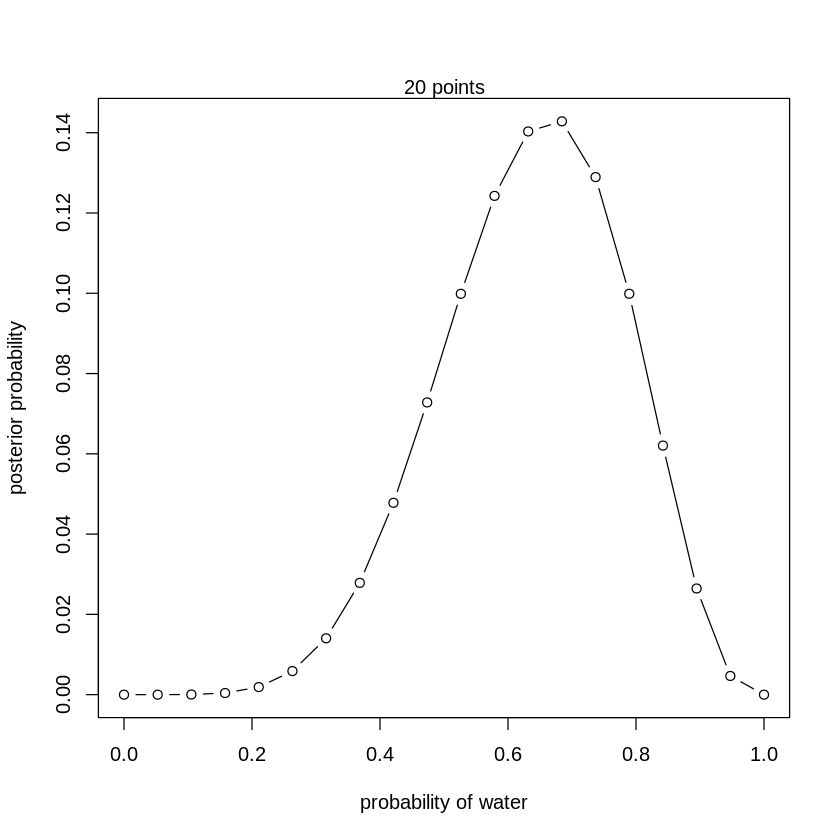

In [15]:
plot( p_grid , posterior , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

R code 2.5

In [16]:
prior <- ifelse( p_grid < 0.5 , 0 , 1 )
prior <- exp( -5*abs( p_grid - 0.5 ) )

R code 2.6

In [17]:
library(rethinking)
globe.qa <- quap(
alist(
W ~ dbinom( W+L ,p) , # binomial likelihood
p ~ dunif(0,1)
# uniform prior
) ,
data=list(W=6,L=3) )
# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666664,0.1571338,0.4155362,0.9177966


R code 2.7

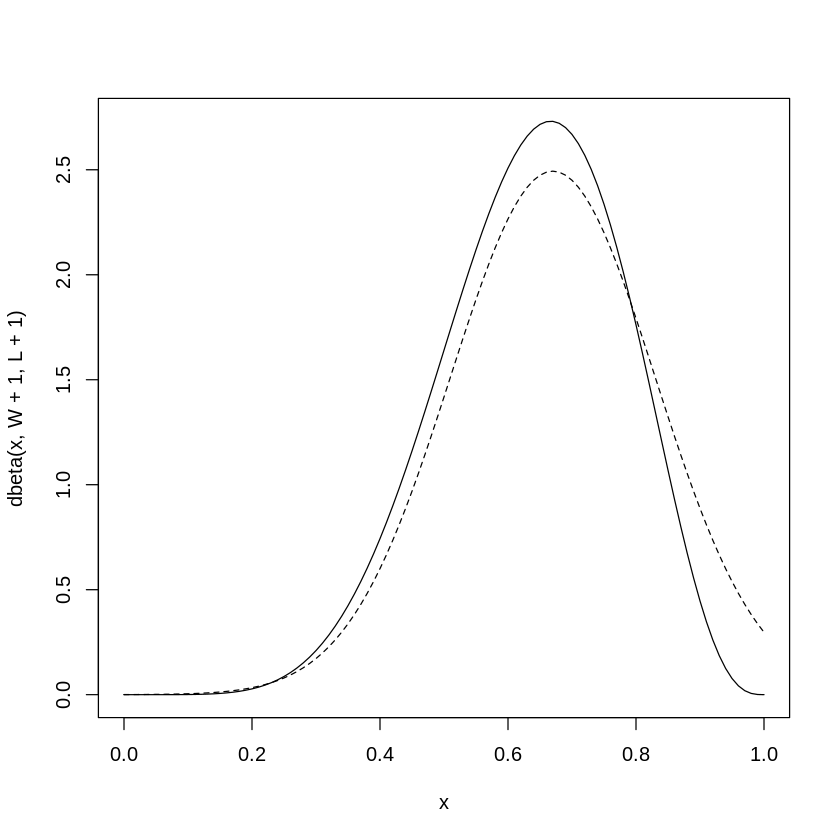

In [18]:
# analytical calculation
W <- 6
L <- 3
curve( dbeta( x , W+1 , L+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )

R code 2.8

In [19]:
n_samples <- 1000
p <- rep( NA , n_samples )
p[1] <- 0.5
W <- 6
L <- 3
for ( i in 2:n_samples ) {
p_new <- rnorm( 1 , p[i-1] , 0.1 )
if ( p_new < 0 ) p_new <- abs( p_new )
if ( p_new > 1 ) p_new <- 2 - p_new
q0 <- dbinom( W , W+L , p[i-1] )
q1 <- dbinom( W , W+L , p_new )
p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}

R code 2.9

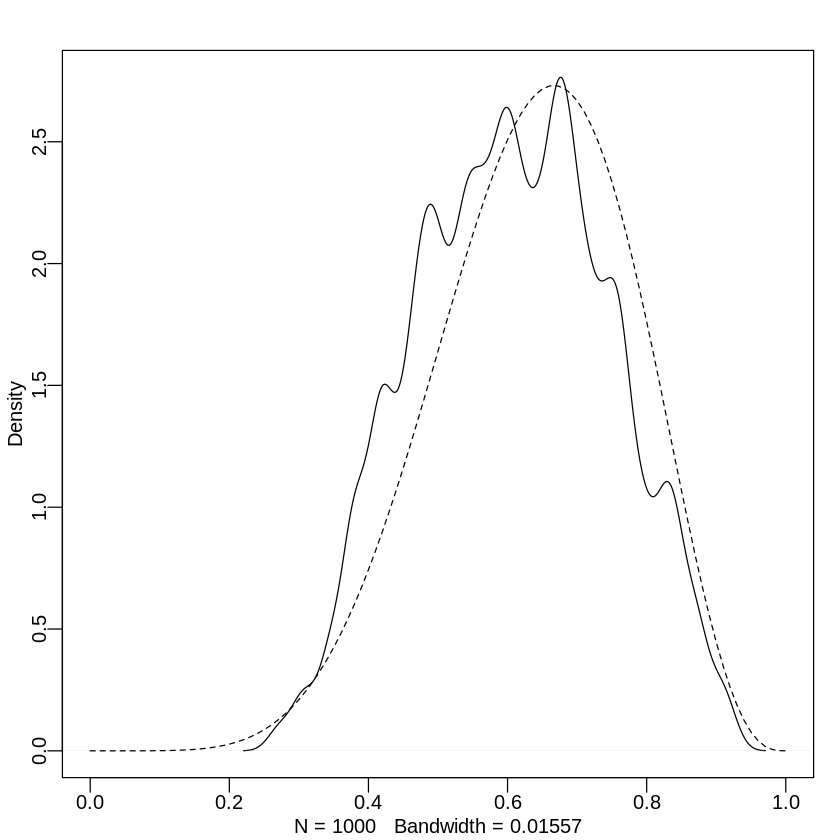

In [20]:
dens( p , xlim=c(0,1) )
curve( dbeta( x , W+1 , L+1 ) , lty=2 , add=TRUE )